In [27]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [138]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.0
n_e = 100000.


theta = np.pi * (5.)/180.
epsilon = 0.01
#n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 100. * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)

#cos_xi = np.arange(-1., 1., 2./100)
#cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#gamma = np.arange(1, 11, 0.1)

#def delta_function(n, gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp(-argument**2./epsilon**2.)
#    return f


n_dn = (nu / nu_c) * abs(np.sin(theta))
#beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
C = 10.

#def n_up(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    ans = 10.* (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.)) * (nu/nu_c) * (1. - beta**2 * (np.cos(theta))**2)
#    return ans
    
    
def K_s(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def MJ_f(gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    prefactor_MJ  = 1. / (m**3 * c**3 * gamma**2 * beta)
    thermal_dist_prefactor = n_e / (4. * np.pi * theta_e)
    thermal_dist_exp = np.exp(- gamma/theta_e)
    thermal_dist_body = gamma * np.sqrt(gamma**2 - 1.)/special.kn(2., 1./theta_e)
    thermal_dist = thermal_dist_prefactor * thermal_dist_body * thermal_dist_exp
    MJ = prefactor_MJ * thermal_dist
    return MJ

#def jnu_integrand_in_eq60(cos_xi, gamma, n):
#    beta = np.sqrt(1. - 1./gamma**2.)
    
#    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    
#    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
#    I = prefactor_Jnu * MJ_f(gamma) * d_3_p * K_s(n, gamma, cos_xi)
    
#    f = delta_function(n, gamma, cos_xi) * I


#   change the order of integral, which means integral over gamma first, then sum over n

def I_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_Jnu = 2. * np.pi * e**2 * nu**2 / c
    d_3_p = m**3 * c**3 * gamma**2 * beta * 2 * np.pi
    
    ans = prefactor_Jnu * MJ_f(gamma) * d_3_p * K_s(n, gamma)
    
    return ans

def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn
    
    
def jnu_integrand_in_eq62(gamma, n):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor_62 = 1. / (nu * beta * np.absolute(np.cos(theta)))
    
    f = prefactor_62 * I_in_eq62(gamma, n)
    
    return f

def jnu_n_integral_62_one(n):
    
    def jnu_integrand_in_eq62_gamma(gamma):
        jnu_integrand_62 = jnu_integrand_in_eq62(gamma, n)
        return jnu_integrand_62
    
    ans_once = quad(jnu_integrand_in_eq62_gamma, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 1e-29)[0]
    
    return ans_once

#print jnu_n_integral_62_one(500)

#def n_peak(nu):
#    if nu < nu_c * theta_e**2:
#        beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#        ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
#    else:
#        beta_here = np.sqrt(1. - (2. * theta_e * nu / nu_c)**(- 2./3.))
#        ans = (2. * theta_e * nu /nu_c )**(1./3.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
#    return ans

gamma_here_1 = np.sqrt((1. + theta_e) * (2. * theta_e * nu/nu_c)**(1./3.))
beta_here_1  = np.sqrt(1. - 1./(gamma_here_1**2))
n_peak_first_part = (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.))
n_peak_second_part = (nu/nu_c) * (1. - (beta_here_1 * np.cos(theta))**2)
n_peak       = n_peak_first_part * n_peak_second_part


def jnu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(jnu_n_integral_62_one, n_max, C * n_peak, epsabs = 1e-29)[0]
    
    return ans
    

def jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + jnu_n_integral_62_one(i)
#        print ans
        
    total = ans + jnu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total

#print n_peak

In [139]:
n_max_sum = 30.

print jnu_62_sum_to_n_max_integral_to_n_limit(n_max_sum)

3.75312018397e-18


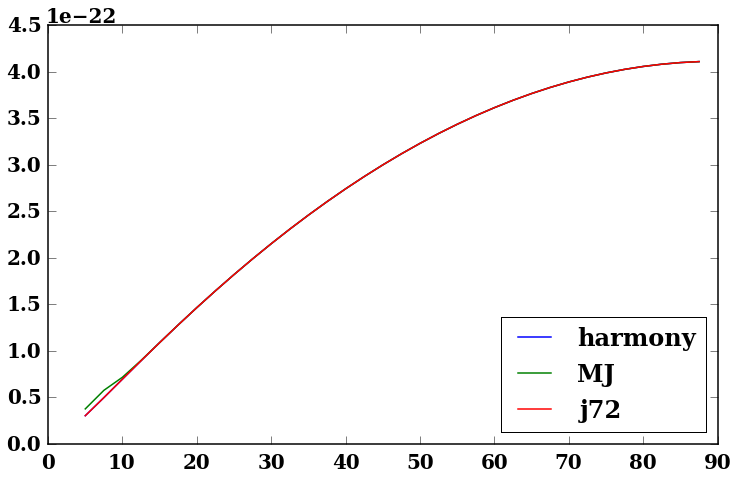

In [143]:
data_iharmony = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/iharmony/thermal_output.txt')
data_MJ       = np.loadtxt('/Users/zhaoweizhang/Documents/summer_new/my_data/compare_MJ_harmony.txt')
pl.plot(data_iharmony[:,0], data_iharmony[:,1], label = 'harmony')
pl.plot(data_MJ[:,0], 10**(-5) * data_MJ[:,1], label = 'MJ')
pl.plot(data_iharmony[:,0], data_iharmony[:,1], label = 'j72')
pl.legend(loc = 'lower right')
pl.show()





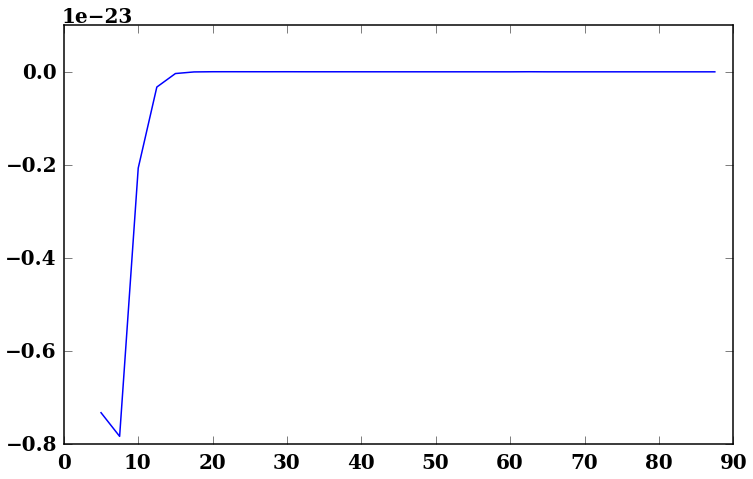

In [137]:
error_mj_iharmony = data_iharmony[:,1] - 10**(-5) * data_MJ[:,1]
x_degree = np.arange(5,90,2.5)
pl.plot(x_degree, error_mj_iharmony)

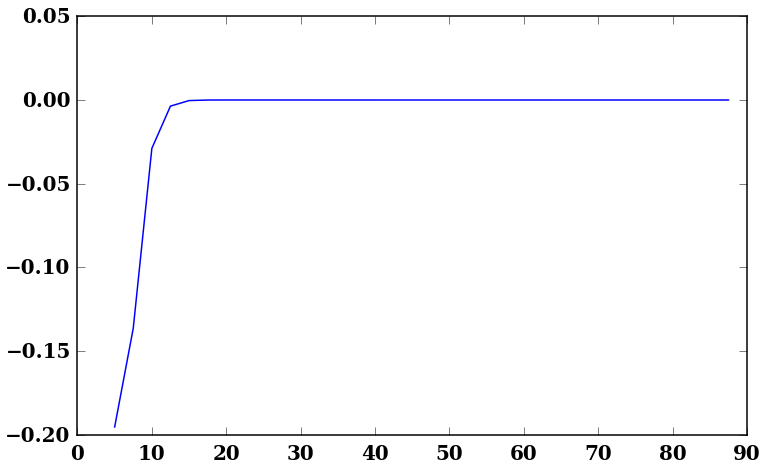

In [140]:
error_mj_iharmony_2 = (data_iharmony[:,1]/(10**(-5) * data_MJ[:,1])) - 1.
x_degree = np.arange(5,90,2.5)
pl.plot(x_degree, error_mj_iharmony_2)